<a href="https://colab.research.google.com/github/harshitha3506/Yuva-Internship---Junior-Data-Analyst/blob/main/internship_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREATING SAMPLE DATASETS

In [ ]:
import pandas as pd
import numpy as np

# -------------------------------
# DATASET 1: Potato Price Dataset
# -------------------------------

dates = pd.date_range(start="2019-01-01", end="2024-12-31", freq="7D")
prices = np.random.randint(800, 2000, len(dates))

potato_df = pd.DataFrame({
    "Date": dates,
    "Modal Price": prices
})
potato_df.to_csv("Potato_Price_Data.csv", index=False)


# ----------------------------------------
# DATASET 2: Rice Suitability (Rainfall etc.)
# ----------------------------------------

rice_df = pd.DataFrame({
    "Rainfall": np.random.randint(80, 400, 30),
    "Temperature": np.random.randint(22, 38, 30),
    "Soil_PH": np.random.uniform(4.5, 8.0, 30),
    "Irrigation": np.random.randint(0, 2, 30),
    "Suitable": np.random.randint(0, 2, 30)
})
rice_df.to_csv("Rice_Data.csv", index=False)


# -----------------------------------------
# DATASET 3: Tomato Supply Chain Loss Dataset
# -----------------------------------------

tomato_df = pd.DataFrame({
    "Transport_Time": np.random.randint(2, 14, 50),
    "Distance_km": np.random.randint(10, 150, 50),
    "Temperature": np.random.randint(20, 40, 50),
    "Cold_Storage": np.random.randint(0, 2, 50),
    "Loss_%": np.random.randint(5, 50, 50)
})
tomato_df.to_csv("Tomato_Loss_Data.csv", index=False)


# ------------------------------------------------
# DATASET 4: Cold Chain Profit & Savings Dataset
# ------------------------------------------------

cold_df = pd.DataFrame({
    "Spoilage_Reduction_kg": np.random.randint(400, 700, 20),
    "Energy_Cost": np.random.randint(20000, 30000, 20),
    "Transport_Savings": np.random.randint(10000, 20000, 20),
    "Profit": np.random.randint(40000, 60000, 20)
})
cold_df.to_csv("ColdChain_Profit.csv", index=False)


# ------------------------------------------------
# DATASET 5: Risk Assessment Dataset
# ------------------------------------------------

risk_df = pd.DataFrame({
    "Likelihood": np.random.randint(1, 4, 20),
    "Impact": np.random.randint(1, 4, 20)
})
risk_df.to_csv("Risk_Data.csv", index=False)


# ------------------------------------------------
# DATASET 6: Sustainability Dataset
# ------------------------------------------------

sustain_df = pd.DataFrame({
    "Indicator": ["Energy","Water","Emissions","Profit","Jobs","Women_Inclusion"],
    "Score": np.random.randint(1, 6, 6)
})
sustain_df.to_csv("Sustainability.csv", index=False)

print("ALL DATASETS CREATED SUCCESSFULLY!")


ALL DATASETS CREATED SUCCESSFULLY!


In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 7.9 MB/s eta 0:00:00


Potato Market Analysis → ML: Price Prediction Model
Predict future potato prices using historical price data.
Load potato daily price dataset

Clean data → handle missing values

Extract features:

year, month, day, lag_1, lag_7, rolling_avg_30


Split into train/test

Train model:

model = LinearRegression()
model.fit(X_train, y_train)


Predict 2025 price

Plot actual vs predicted

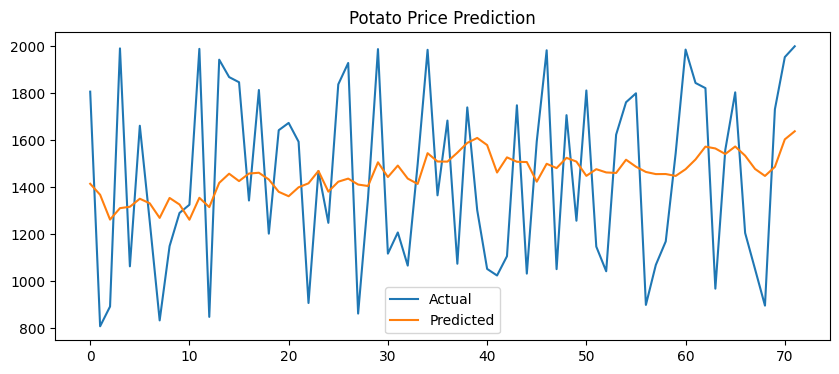

(328.60534049932005, np.float64(365.543747856114))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("Potato_Price_Data.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['lag_7'] = df['Modal Price'].shift(7)
df['rolling_30'] = df['Modal Price'].rolling(window=30).mean()

df = df.dropna()

X = df[['day','month','year','lag_7','rolling_30']]
y = df['Modal Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=False
)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title("Potato Price Prediction")
plt.show()

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

mae, rmse


Crop Yield Optimization → ML: Crop Suitability Model
Predict how suitable a district is for rice using climate & soil data.

Classification Model
Logistic Regression
Random Forest

Decision Tree
Feature Selection
Create label:

suitable = 1, not suitable = 0


Train model


Get feature importance

Predict suitability score for your district

Suggest optimization based on output

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.20      0.25      0.22         4

    accuracy                           0.22         9
   macro avg       0.23      0.23      0.22         9
weighted avg       0.23      0.22      0.22         9



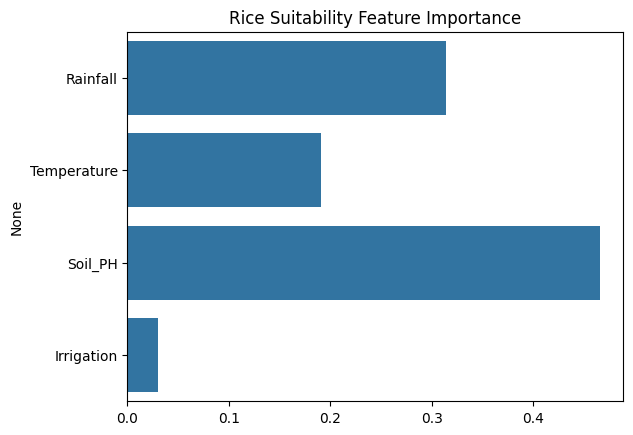

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Rice_Data.csv")

X = df.drop("Suitable", axis=1)
y = df["Suitable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Rice Suitability Feature Importance")
plt.show()


Tomato Supply Chain Analysis → ML: Loss Prediction Model
Predict post-harvest loss % based on handling, transport, distance, storage etc.
Regression
Random Forest Regressor
Model Workflow:

Train → Loss % prediction

Test model accuracy

Identify factors causing high loss

Recommend improvements

Loss MAE: 10.585


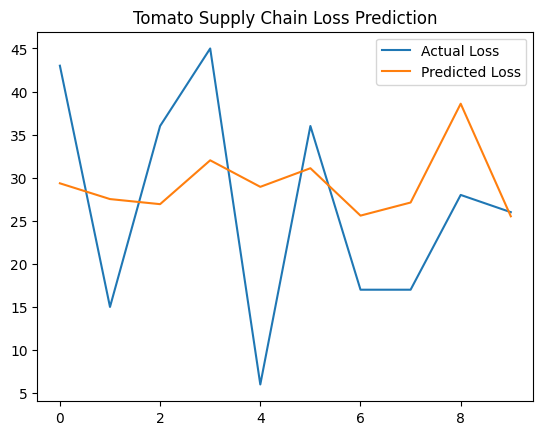

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv("Tomato_Loss_Data.csv")

X = df.drop("Loss_%", axis=1)
y = df["Loss_%"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Loss MAE:", mean_absolute_error(y_test, pred))

plt.plot(y_test.values, label="Actual Loss")
plt.plot(pred, label="Predicted Loss")
plt.legend()
plt.title("Tomato Supply Chain Loss Prediction")
plt.show()


Cost–Benefit Analysis → ML: Profit Forecasting Model
Predict yearly profit/savings from cold storage.

Prepare dataset of yearly profits

Train regression model

Predict future profits

Compare ML profit vs manual NPV

Visualize cumulative savings curve

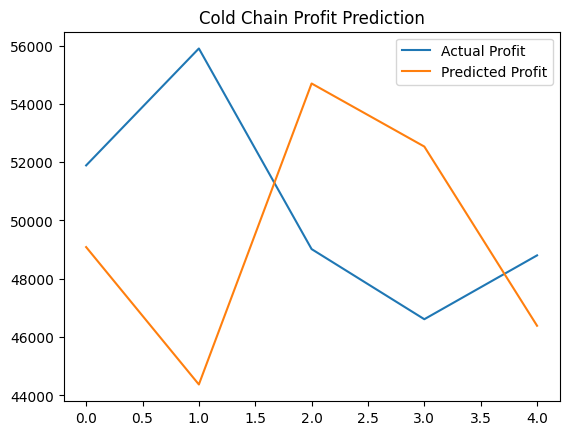

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("ColdChain_Profit.csv")

X = df[["Spoilage_Reduction_kg","Energy_Cost","Transport_Savings"]]
y = df["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

plt.plot(y_test.values, label="Actual Profit")
plt.plot(pred, label="Predicted Profit")
plt.legend()
plt.title("Cold Chain Profit Prediction")
plt.show()


Risk Assessment → ML: Risk Scoring Model
ML Concept Used:

Clustering (Unsupervised ML)

K-Means clustering
Risk scoring algorithms
PCA (dimensionality reduction)
Convert risk table to numeric dataset

Apply K-Means clustering

Form clusters like:

High Risk

Medium Risk

Low Risk

Visualize clusters

Assign risk score automatically

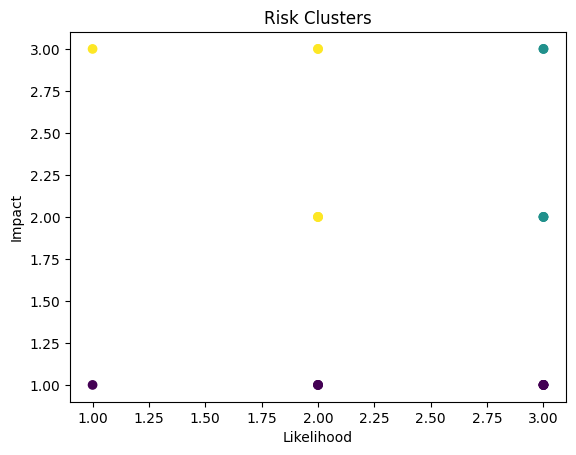

,Likelihood,Impact,Cluster
0,3,1,0
1,2,2,2
2,2,1,0
3,2,2,2
4,1,1,0
5,3,2,1
6,2,3,2
7,2,1,0
8,3,1,0
9,2,3,2


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("Risk_Data.csv")

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df)

plt.scatter(df["Likelihood"], df["Impact"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Likelihood")
plt.ylabel("Impact")
plt.title("Risk Clusters")
plt.show()

df


Sustainability Assessment → ML: Sustainability Scoring Model
ML Concept Used:

Multi-Criteria Scoring Model
 Weighted ML scoring
Normalization
Radar chart visualization

Normalize scores:

normalized = (x - min) / (max - min)


Apply ML weights (or PCA weights)

Calculate total sustainability index:


Rank sustainability

Create radar char

In [ ]:
import pandas as pd

df = pd.read_csv("Sustainability.csv")

df["Norm_Score"] = (df["Score"] - df["Score"].min()) / (
    (df["Score"].max() - df["Score"].min()) + 1e-9
)

df["Weighted_Score"] = df["Norm_Score"] * 0.4

df


,Indicator,Score,Norm_Score,Weighted_Score
0,Energy,4,1.000000,0.400000
1,Water,4,1.000000,0.400000
2,Emissions,1,0.000000,0.000000
3,Profit,3,0.666667,0.266667
4,Jobs,2,0.333333,0.133333
5,Women_Inclusion,2,0.333333,0.133333
